In [1]:
import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from datetime import date
import io
import json
import os

In [2]:
jsonfile='MEDWEST60_y2010m01d01-y2010m09d30.json'


In [3]:
sourcefile=open(jsonfile,'rU',encoding='utf-8')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
list_profiles=infos.keys()

reference =  str(list(list_profiles)[0])
lat_prof = infos[reference]['latitude']
lon_prof = infos[reference]['longitude']


/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [4]:
print(reference[2:10])

12031822


In [5]:
with open('prof0.txt','w') as txt_file:
    txt_file.write('Profile_'+str(reference[2:10])+' '+str(lon_prof)+' '+str(lat_prof))

In [6]:
%time
!/gpfswork/rech/egi/rote001/git/sosie/bin/ij_from_lon_lat.x -i /gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_hgr.nc4 -p prof0.txt >/dev/null

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
/gpfswork/rech/egi/rote001/git/sosie/bin/ij_from_lon_lat.x: error while loading shared libraries: libnetcdf.so.15: cannot open shared object file: No such file or directory


In [7]:
with open('ij_found.out','r') as txt_file:
    last_line = txt_file.readlines()[-1]
    i0=int(last_line.split()[1])
    j0=int(last_line.split()[2])
    print(i0,j0)

604 446


In [8]:
dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
latN = dsN.nav_lat
lonN = dsN.nav_lon


In [9]:
tmaskN=dsN.tmask

In [10]:
tmaskN

<xarray.DataArray 'tmask' (t: 1, z: 212, y: 803, x: 883)>
[150318388 values with dtype=int8]
Dimensions without coordinates: t, z, y, x

In [11]:
i0

604

In [12]:
tmask0=tmaskN[0,0,int(j0),int(i0)]

In [13]:
print(tmask0)

<xarray.DataArray 'tmask' ()>
array(1, dtype=int8)


In [14]:
def check_prof_in_ocean(i0,j0):
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    if tmaskN[0,0,int(j0),int(i0)] == 1:
        print('selected profile falls within MEDWEST60 oceanic points, the program is proceeding')
        check=0
    else:
        print('selected profile does not fall within MEDWEST60 oceanic points, the program is stopping')
        check=0
    return check

In [15]:
date_prof = infos[reference]['date']
file_prof = infos[reference]['file']
prof_prof = infos[reference]['profile no']


In [16]:
print(date_prof)

2010-01-03T00:02:00.000000000


In [17]:
year=int(date_prof[0:4])
month=int(date_prof[5:7])
day=int(date_prof[8:10])

In [18]:
date=datetime.date(int(date_prof[0:4]),int(date_prof[5:7]),int(date_prof[8:10]))

In [19]:
print(date)

2010-01-03


In [20]:
date_avant=date-datetime.timedelta(days=15)
date_apres=date+datetime.timedelta(days=15)


In [21]:
print(date_avant)

2009-12-19


In [22]:
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    return [start+datetime.timedelta(days=i) for i in range(r)]
dateList = date_range(date_avant, date_apres) # list of days between datemin and datemax


In [23]:
print(list(dateList))

[datetime.date(2009, 12, 19), datetime.date(2009, 12, 20), datetime.date(2009, 12, 21), datetime.date(2009, 12, 22), datetime.date(2009, 12, 23), datetime.date(2009, 12, 24), datetime.date(2009, 12, 25), datetime.date(2009, 12, 26), datetime.date(2009, 12, 27), datetime.date(2009, 12, 28), datetime.date(2009, 12, 29), datetime.date(2009, 12, 30), datetime.date(2009, 12, 31), datetime.date(2010, 1, 1), datetime.date(2010, 1, 2), datetime.date(2010, 1, 3), datetime.date(2010, 1, 4), datetime.date(2010, 1, 5), datetime.date(2010, 1, 6), datetime.date(2010, 1, 7), datetime.date(2010, 1, 8), datetime.date(2010, 1, 9), datetime.date(2010, 1, 10), datetime.date(2010, 1, 11), datetime.date(2010, 1, 12), datetime.date(2010, 1, 13), datetime.date(2010, 1, 14), datetime.date(2010, 1, 15), datetime.date(2010, 1, 16), datetime.date(2010, 1, 17), datetime.date(2010, 1, 18)]


In [27]:
!ls /gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv

MEDWEST60-BLBT02_y2009m06d30.1h_gridT-2D.nc
MEDWEST60-BLBT02_y2009m06d30.1h_gridU-2D.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridS.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridT-2D.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridT.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridU-2D.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridU.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridV-2D.nc
MEDWEST60-BLBT02_y2010m01d01.1h_gridV.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridS.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridT-2D.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridT.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridU-2D.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridU.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridV-2D.nc
MEDWEST60-BLBT02_y2010m01d02.1h_gridV.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridS.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridT-2D.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridT.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridU-2D.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridU.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridV-2D.nc
MEDWEST60-BLBT02_y2010m01d03.1h_gridV.nc
MEDWEST60-BLBT02_y2010m0

In [29]:
for date in dateList:
    mm="{:02d}".format(date.month) #month on 2 digits
    dd="{:02d}".format(date.day) # day on 2 digits
    file='/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y'+str(date.year)+'m'+str(mm)+'d'+str(dd)+'.1h_gridT.nc'
    if not os.path.exists(file):
        print(file)
        print('some data is missing, the programm will stop')
        
        

/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d19.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d20.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d21.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d22.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d23.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d24.1h_gridT.nc
some data is missing, the programm will stop
/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y2009m12d25.1h_gridT.nc
some data is missing, t

In [26]:
i=1
j=1
print(np.array(tmaskN[0,0,int(j0)-j,int(i0)-i]))

1


In [90]:
def check_prof_near_coast(i0,j0):
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    check=0
    for i in np.arange(30):
        for j in np.arange(30):
            if (np.array(tmaskN[0,0,int(j0)-j,int(i0)-i])+np.array(tmaskN[0,0,int(j0)-j,int(i0)+i])+np.array(tmaskN[0,0,int(j0)+j,int(i0)-i])+np.array(tmaskN[0,0,int(j0)+j,int(i0)+i])) < 4:
                check=check+1
                print('selected profile is too close to continent, the program is stopping')
    return check



In [91]:
check=check_prof_near_coast(i0,j0)
print(check)

0


In [86]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

def map_profile_from_jsonfile(all_lat,all_lon):
    


    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonmin, lonmax, latmin, latmax))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)
    ax.add_patch(mpatches.Circle(xy=[all_lon, all_lat], radius=0.5, color='green', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))

    plt.scatter(all_lon, all_lat, c='g', linewidth='0', s=18);


<xarray.DataArray 'nav_lat' ()>
array(34.84750366) <xarray.DataArray 'nav_lat' ()>
array(45.13545609) <xarray.DataArray 'nav_lon' ()>
array(-5.68308401) <xarray.DataArray 'nav_lon' ()>
array(9.59771824)


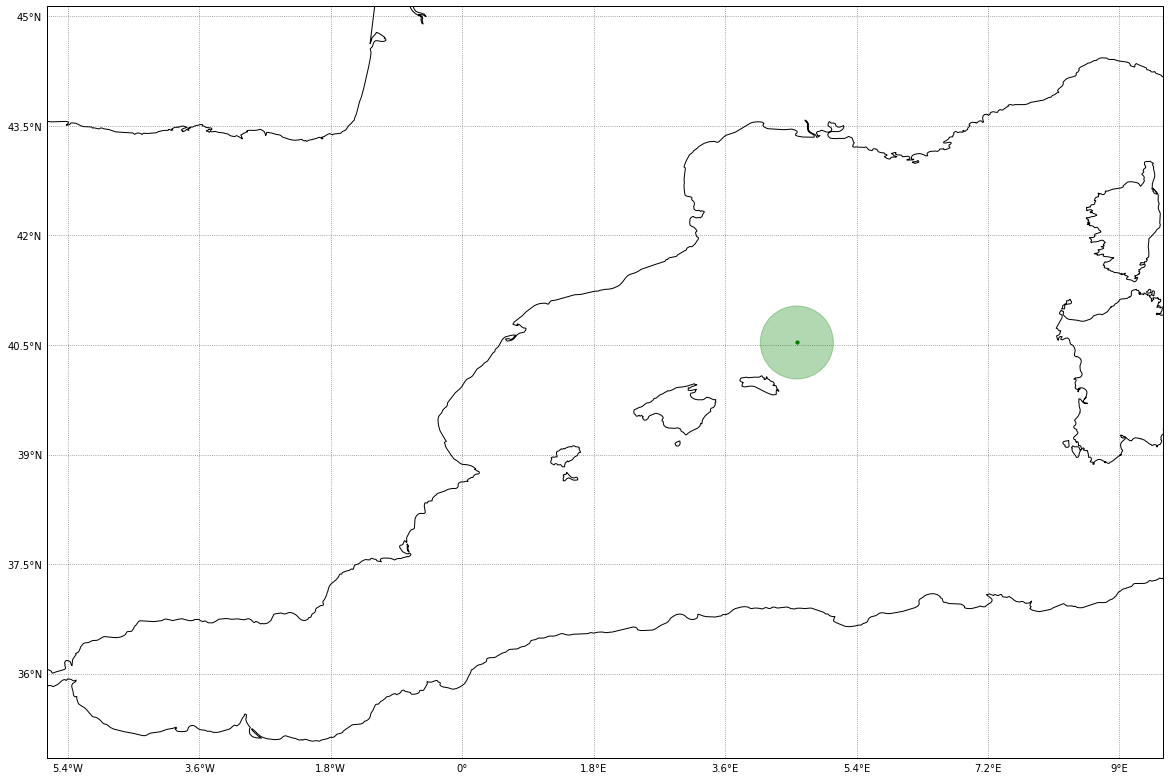

In [87]:
ds=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4')
lat=ds.nav_lat
lon=ds.nav_lon
latmin,latmax,lonmin,lonmax=(lat.min(),lat.max(),lon.min(),lon.max())
print(latmin,latmax,lonmin,lonmax)
map_profile_from_jsonfile(lat_prof,lon_prof)

In [88]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

def map_profile_from_jsonfile(all_lat,all_lon):
    


    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonmin, lonmax, latmin, latmax))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)
    ax.add_patch(mpatches.Circle(xy=[all_lon, all_lat], radius=1, color='green', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))

    plt.scatter(all_lon, all_lat, c='g', linewidth='0', s=18);


<xarray.DataArray 'nav_lat' ()>
array(34.84750366) <xarray.DataArray 'nav_lat' ()>
array(45.13545609) <xarray.DataArray 'nav_lon' ()>
array(-5.68308401) <xarray.DataArray 'nav_lon' ()>
array(9.59771824)


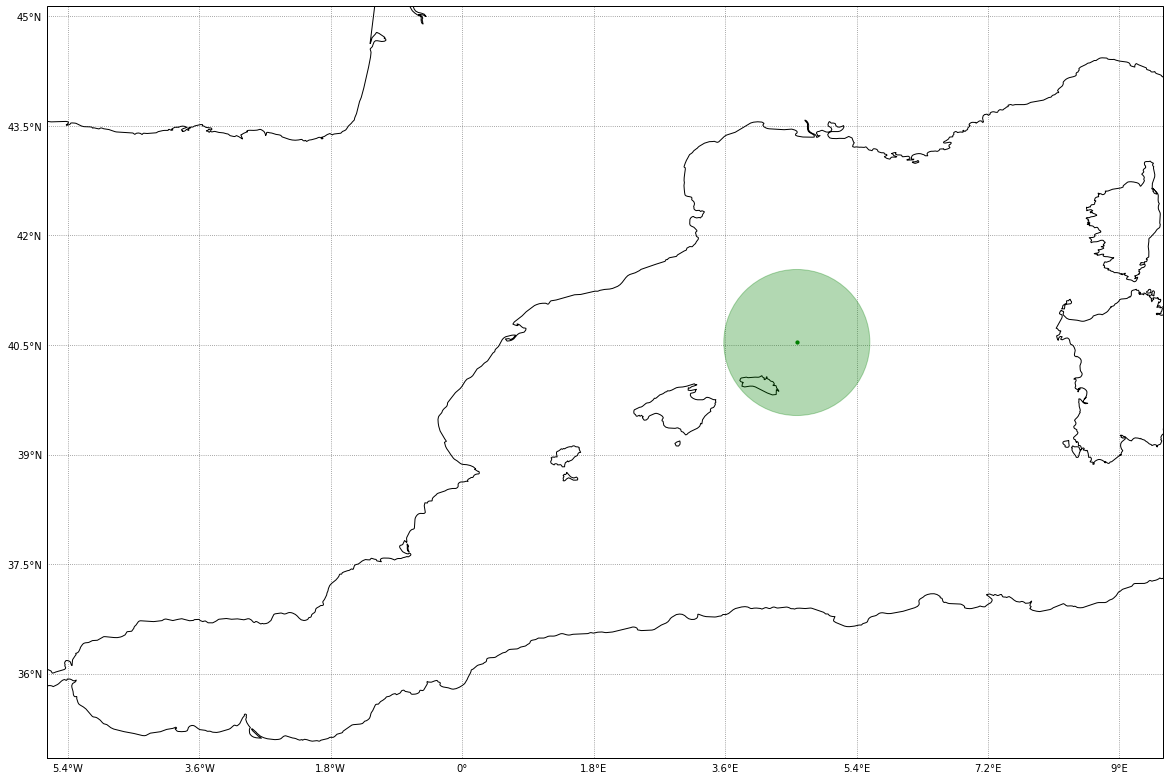

In [89]:
ds=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4')
lat=ds.nav_lat
lon=ds.nav_lon
latmin,latmax,lonmin,lonmax=(lat.min(),lat.max(),lon.min(),lon.max())
print(latmin,latmax,lonmin,lonmax)
map_profile_from_jsonfile(lat_prof,lon_prof)